In [7]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt # visualizing data
%matplotlib inline
import seaborn as sns

In [8]:
#ADD csv file or other file in this way 
df = pd.read_csv('QuickBuy Sales Data.csv', encoding= 'unicode_escape')

In [9]:
#1) see all colum non-null count and datatypes  in tables :
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           103 non-null    object 
 1   Cust_name         103 non-null    object 
 2   Product_ID        103 non-null    object 
 3   Gender            103 non-null    object 
 4   Age Group         103 non-null    object 
 5   Age               103 non-null    float64
 6   Marital_Status    103 non-null    object 
 7   State             103 non-null    object 
 8   Zone              103 non-null    object 
 9   Occupation        103 non-null    object 
 10  Product_Category  103 non-null    object 
 11  Orders            103 non-null    float64
 12  Amount            99 non-null     float64
dtypes: float64(3), object(10)
memory usage: 10.7+ KB


In [14]:
#2) see the total colum ansd row count : 
df.shape

(104, 13)

In [10]:
# 4) find the null value in tables 
pd.isnull(df).sum()

User_ID             1
Cust_name           1
Product_ID          1
Gender              1
Age Group           1
Age                 1
Marital_Status      1
State               1
Zone                1
Occupation          1
Product_Category    1
Orders              1
Amount              5
dtype: int64

In [11]:
   # 3) see the rows data in tables :
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,U001,Ahmed Ali,P001,Male,25-34,30.0,Single,Punjab,North,Engineer,Electronics,2.0,15000.0
1,U002,Fatima Khan,P002,Female,35-44,40.0,Married,Sindh,South,Teacher,Apparel,1.0,5000.0
2,U003,Ali Raza,P003,Male,18-24,22.0,Single,Khyber Pakhtunkhwa,Central,Student,Home Goods,3.0,NaN
3,U004,Aisha Ahmed,P004,Female,45-54,50.0,Married,Balochistan,West,Doctor,Healthcare,1.0,20000.0
4,U005,Bilal Shah,P005,Male,35-44,37.0,Single,Punjab,North,Businessman,Electronics,5.0,25000.0


In [20]:
# 5) remove the null value use :
df.dropna(inplace=True)

In [21]:
# 6) change the data type of veriable: 
df['Amount'] =  df['Amount'].astype('int')

In [22]:
# 7) show all columns in table use :
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [26]:
# 8) change the columns name :
df.rename(columns = {'Cust_name' : 'customer_name'}, inplace=True)

In [28]:
# 8.1) show columns 
df.columns

Index(['User_ID', 'customer_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [29]:
# 9) describe all the coumns : 
df.describe()

,Age,Orders,Amount
count,99.000000,99.000000,99.000000
mean,35.848485,4.484848,13480.808081
std,9.499048,4.216981,5469.389340
min,21.000000,1.000000,5000.000000
25%,29.000000,2.000000,9500.000000
50%,35.000000,3.000000,12000.000000
75%,42.000000,5.000000,16000.000000
max,53.000000,20.000000,30000.000000


In [6]:
#Most Sales in which Zone:
sales_state = df.groupby(['Zone'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data=sales_state, x='Zone', y='Orders')

NameError: name 'df' is not defined

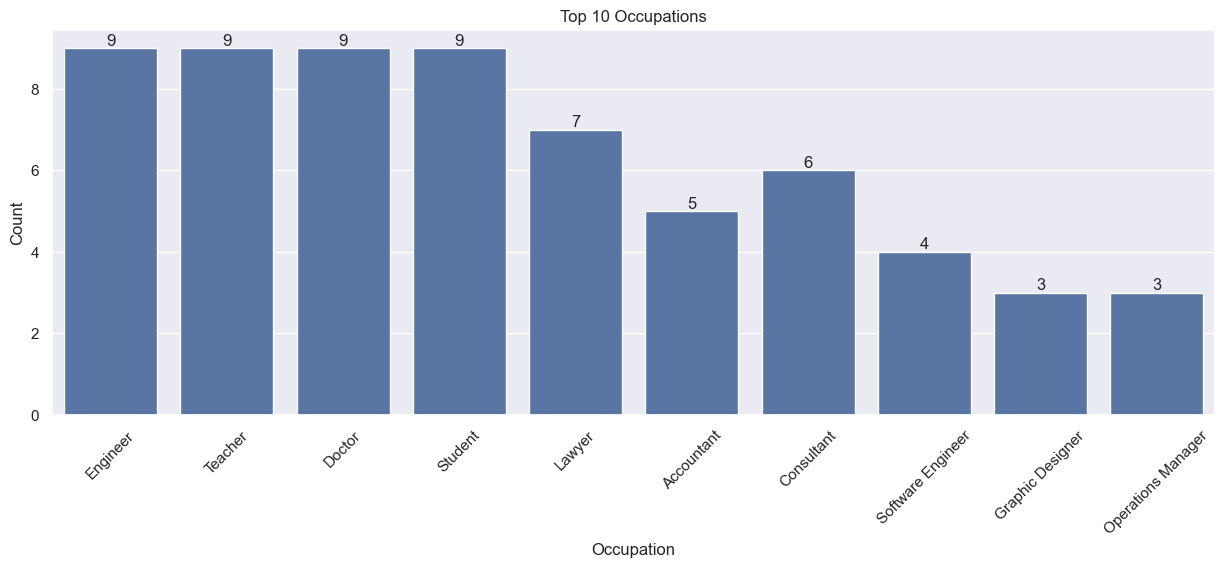

In [36]:
#find the top 10  customer occupation which increse orders: 
occupation_counts = df['Occupation'].value_counts()
top_10_occupations = occupation_counts.head(10).index
top_10_df = df[df['Occupation'].isin(top_10_occupations)]
sns.set(rc={'figure.figsize': (15, 5)})
ax = sns.countplot(data=top_10_df, x='Occupation')
for bars in ax.containers:
    ax.bar_label(bars)
plt.xticks(rotation=45)
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.title('Top 10 Occupations')
plt.show()

In [3]:
#find the top 10  customer occupation which increse sales:
import seaborn as sns
import matplotlib.pyplot as plt

sales_state = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
top_10_sales_state = sales_state.head(10)

sns.set(rc={'figure.figsize': (20, 5)})
ax = sns.barplot(data=top_10_sales_state, x='Occupation', y='Amount')
ax.bar_label(ax.containers[0])

plt.xlabel('Occupation')
plt.ylabel('Total Amount')
plt.title('Top 10 Occupations by Total Amount')
plt.xticks(rotation=45)

plt.show()


NameError: name 'df' is not defined

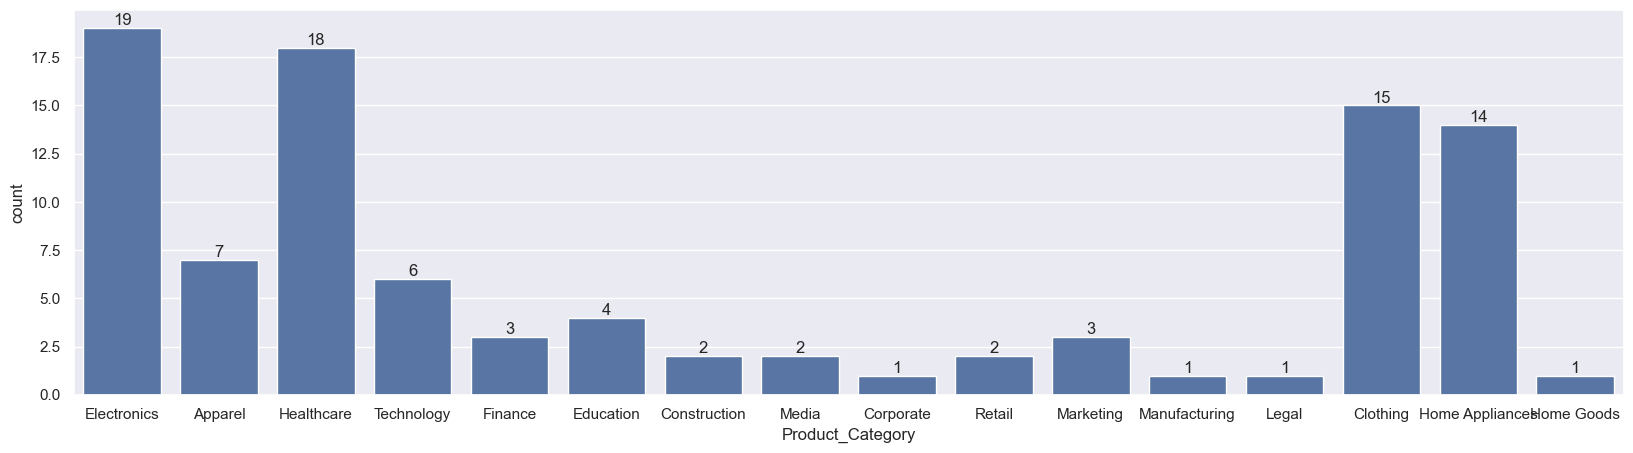

In [38]:
#ALL product Category:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = df, x = 'Product_Category')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

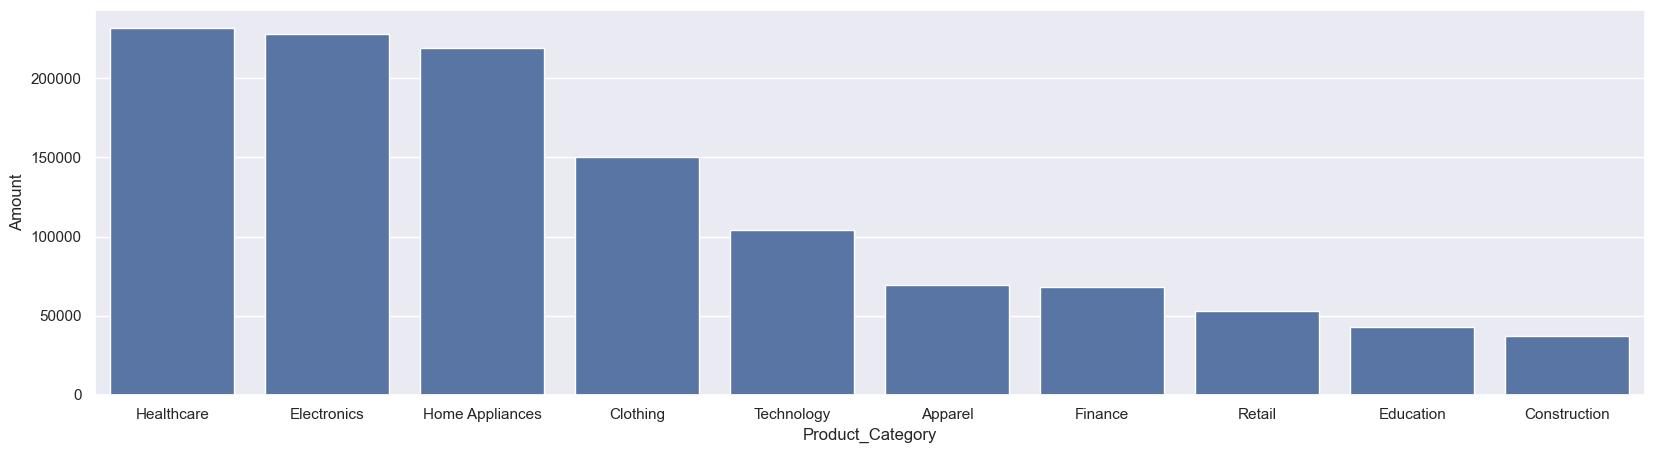

In [39]:
#most sold product Category
sales_state = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Product_Category',y= 'Amount')

<Axes: xlabel='Product_ID', ylabel='Orders'>

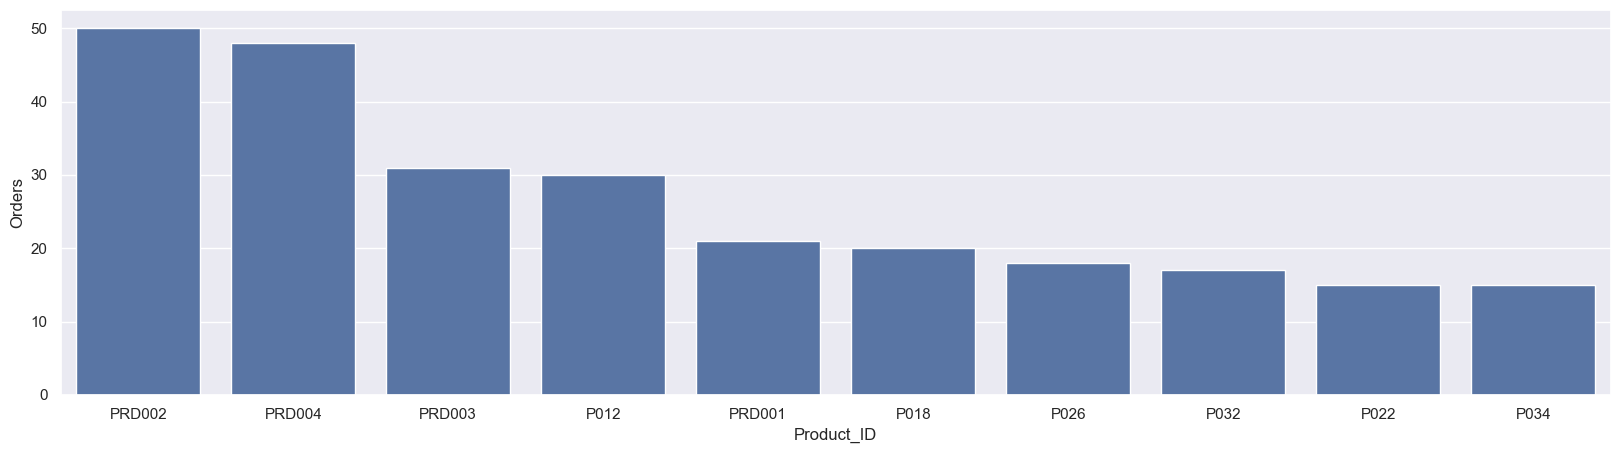

In [40]:
# Most salling product id 
sales_state = df.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Product_ID',y= 'Orders')

<Axes: xlabel='State', ylabel='Amount'>

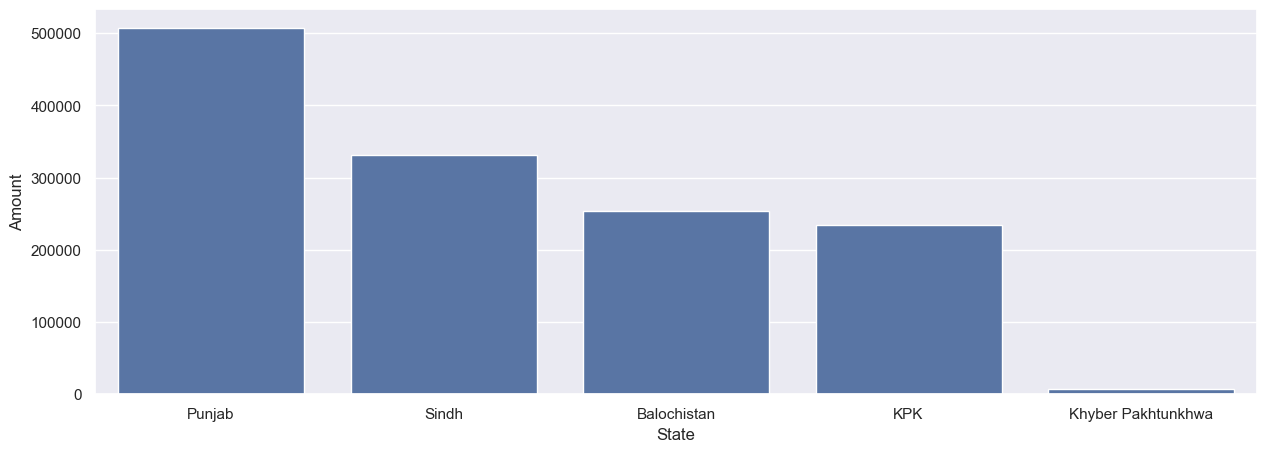

In [41]:
#total number of orders from top 5 states :
sales_state = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = sales_state, x = 'State',y= 'Amount')

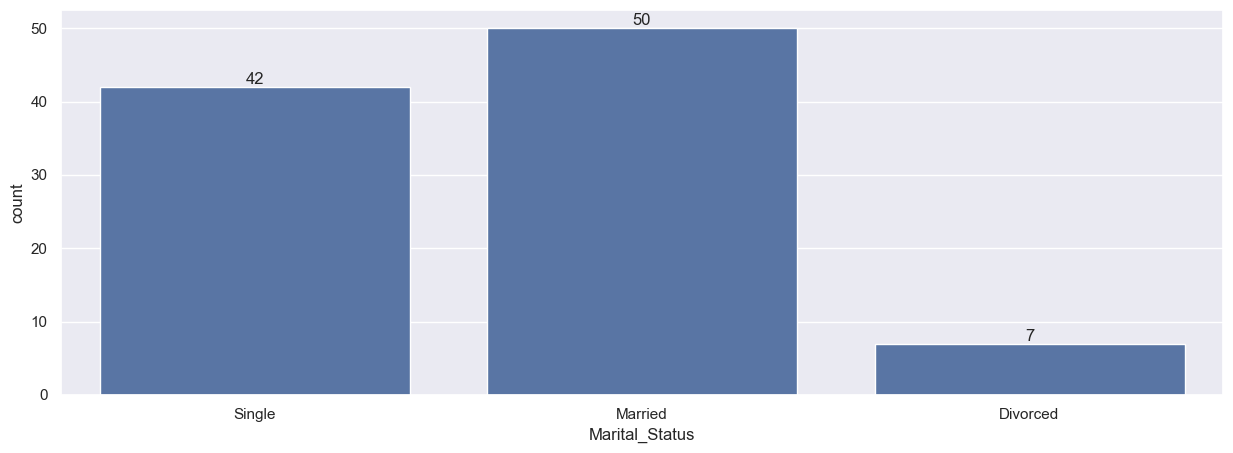

In [42]:
#find the status of person married or unmarried :
ax = sns.countplot(data = df, x = 'Marital_Status')

sns.set(rc={'figure.figsize':(7,5)})
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Gender', ylabel='Amount'>

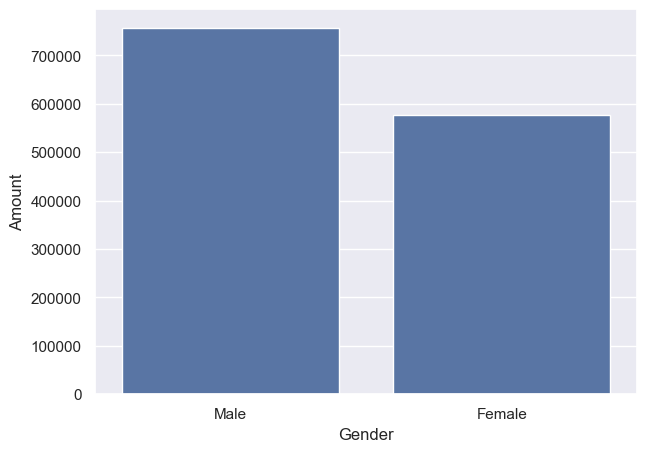

In [44]:
#whos sales is greater male or female 
sales_gen = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.barplot(x = 'Gender',y= 'Amount' ,data = sales_gen)

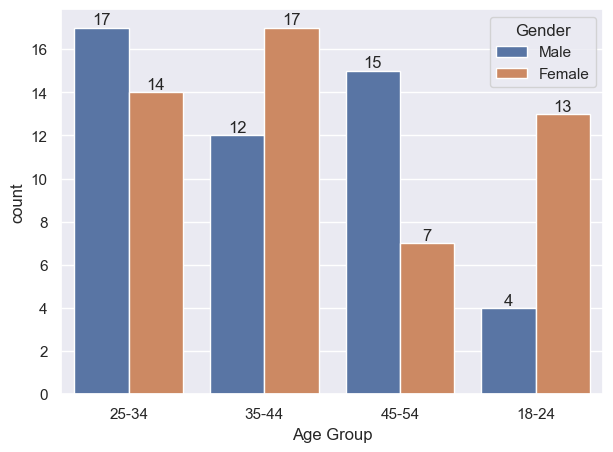

In [45]:
ax = sns.countplot(data = df, x = 'Age Group', hue = 'Gender')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Age Group', ylabel='Amount'>

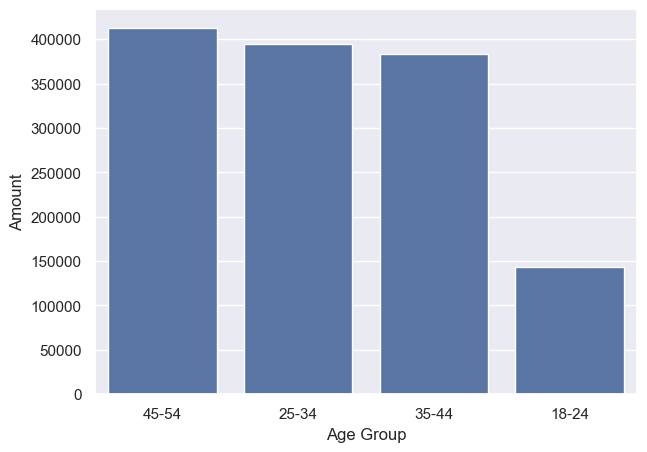

In [46]:
# how we find the Total Amount vs Age Group groups which increase the sale:
sales_age = df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.barplot(x = 'Age Group',y= 'Amount' ,data = sales_age)